<a href="https://colab.research.google.com/github/HongSeongMo/Bigdata_Analysis_Professional/blob/main/241017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/usedcars.csv', encoding='euc-kr',header=0, index_col=0)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,year,fuel,km,price,maker
1,현대 제네시스 BH330 럭셔리 프라임팩,08/09(09년형),가솔린,260000.0,690,현대
2,제네시스 더 올 뉴 G80 3.5 T-GDi AWD,20/06(21년형),가솔린,10000.0,700,제네시스
3,기아 K7 프리미어 3.0 GDI 시그니처,19/07(20년형),가솔린,20000.0,3350,기아
4,기아 더 뉴 K7 3.0 GDI 프레스티지,01월 15일,가솔린,90000.0,1990,기아
5,현대 갤로퍼2 숏바디 이노베이션 밴 인터쿨러 엑시드,02월 10일,디젤,160000.0,550,현대
...,...,...,...,...,...,...
66,기아 레이 1.0 터보 프레스티지,14/08(15년형),가솔린,60000.0,1050,기아
67,르노삼성 SM7 뉴 아트 프레스티지,09/10(10년형),가솔린,150000.0,590,르노삼성
68,현대 뉴 카운티 장축 SUP 29인승,03월 18일,디젤,50000.0,5580,현대
69,기아 뉴 오피러스 GH270 고급형,07월 03일,가솔린,100000.0,320,기아


In [2]:
dfnew = df[['maker','fuel']]

In [3]:
dfnew

,maker,fuel
1,현대,가솔린
2,제네시스,가솔린
3,기아,가솔린
4,기아,가솔린
5,현대,디젤
...,...,...
66,기아,가솔린
67,르노삼성,가솔린
68,현대,디젤
69,기아,가솔린


In [4]:
crosstable = pd.crosstab(dfnew['maker'],dfnew['fuel'], margins=True)
crosstable

fuel,LPG,가솔린,디젤,전기,All
maker,,,,,
GM대우,0,1,3,0,4
기아,2,11,8,0,21
르노삼성,0,1,1,0,2
쉐보레,0,2,1,0,3
쎄미시스코,0,0,0,1,1
아리아워크스루밴,0,0,1,0,1
오딧,0,0,1,0,1
제네시스,0,9,0,0,9
케이씨,0,0,1,0,1


In [5]:
print(crosstable.loc[['현대'],['디젤']])

fuel   디젤
maker    
현대      9


In [6]:
maker_freq = dfnew['maker'].value_counts()
maker_freq

,count
maker,
현대,27
기아,21
제네시스,9
GM대우,4
쉐보레,3
르노삼성,2
오딧,1
아리아워크스루밴,1
쎄미시스코,1


In [7]:
maker_prop = (dfnew['maker'].value_counts(normalize=True))*100
maker_prop

,proportion
maker,
현대,38.571429
기아,30.000000
제네시스,12.857143
GM대우,5.714286
쉐보레,4.285714
르노삼성,2.857143
오딧,1.428571
아리아워크스루밴,1.428571
쎄미시스코,1.428571


In [8]:
result_df = pd.concat([maker_freq, maker_prop], axis=1)
result_df.columns = ['Frequency','Ratio(%)']
result_df

,Frequency,Ratio(%)
maker,,
현대,27,38.571429
기아,21,30.000000
제네시스,9,12.857143
GM대우,4,5.714286
쉐보레,3,4.285714
르노삼성,2,2.857143
오딧,1,1.428571
아리아워크스루밴,1,1.428571
쎄미시스코,1,1.428571


In [9]:
from collections import Counter
import pandas as pd

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/usedcars.csv', encoding='euc-kr',header=0, index_col=0)
df

,title,year,fuel,km,price,maker
1,현대 제네시스 BH330 럭셔리 프라임팩,08/09(09년형),가솔린,260000.0,690,현대
2,제네시스 더 올 뉴 G80 3.5 T-GDi AWD,20/06(21년형),가솔린,10000.0,700,제네시스
3,기아 K7 프리미어 3.0 GDI 시그니처,19/07(20년형),가솔린,20000.0,3350,기아
4,기아 더 뉴 K7 3.0 GDI 프레스티지,01월 15일,가솔린,90000.0,1990,기아
5,현대 갤로퍼2 숏바디 이노베이션 밴 인터쿨러 엑시드,02월 10일,디젤,160000.0,550,현대
...,...,...,...,...,...,...
66,기아 레이 1.0 터보 프레스티지,14/08(15년형),가솔린,60000.0,1050,기아
67,르노삼성 SM7 뉴 아트 프레스티지,09/10(10년형),가솔린,150000.0,590,르노삼성
68,현대 뉴 카운티 장축 SUP 29인승,03월 18일,디젤,50000.0,5580,현대
69,기아 뉴 오피러스 GH270 고급형,07월 03일,가솔린,100000.0,320,기아


In [11]:
frequency = Counter(df['maker'])
frequency

Counter({'현대': 27,
         '제네시스': 9,
         '기아': 21,
         '쉐보레': 3,
         '오딧': 1,
         '아리아워크스루밴': 1,
         'GM대우': 4,
         '쎄미시스코': 1,
         '르노삼성': 2,
         '케이씨': 1})

In [12]:
print(type(frequency))

<class 'collections.Counter'>


In [13]:
N= sum(frequency.values())
N

70

In [14]:
for item in frequency:
    print(item, frequency[item], round((frequency[item]/N)*100, 6))
    # print(item)

현대 27 38.571429
제네시스 9 12.857143
기아 21 30.0
쉐보레 3 4.285714
오딧 1 1.428571
아리아워크스루밴 1 1.428571
GM대우 4 5.714286
쎄미시스코 1 1.428571
르노삼성 2 2.857143
케이씨 1 1.428571


In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [16]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

In [17]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from collections import Counter

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/usedcars.csv', encoding='euc-kr', index_col=0)
df

,title,year,fuel,km,price,maker
1,현대 제네시스 BH330 럭셔리 프라임팩,08/09(09년형),가솔린,260000.0,690,현대
2,제네시스 더 올 뉴 G80 3.5 T-GDi AWD,20/06(21년형),가솔린,10000.0,700,제네시스
3,기아 K7 프리미어 3.0 GDI 시그니처,19/07(20년형),가솔린,20000.0,3350,기아
4,기아 더 뉴 K7 3.0 GDI 프레스티지,01월 15일,가솔린,90000.0,1990,기아
5,현대 갤로퍼2 숏바디 이노베이션 밴 인터쿨러 엑시드,02월 10일,디젤,160000.0,550,현대
...,...,...,...,...,...,...
66,기아 레이 1.0 터보 프레스티지,14/08(15년형),가솔린,60000.0,1050,기아
67,르노삼성 SM7 뉴 아트 프레스티지,09/10(10년형),가솔린,150000.0,590,르노삼성
68,현대 뉴 카운티 장축 SUP 29인승,03월 18일,디젤,50000.0,5580,현대
69,기아 뉴 오피러스 GH270 고급형,07월 03일,가솔린,100000.0,320,기아


In [19]:
frequency = Counter(df.maker)
frequency

Counter({'현대': 27,
         '제네시스': 9,
         '기아': 21,
         '쉐보레': 3,
         '오딧': 1,
         '아리아워크스루밴': 1,
         'GM대우': 4,
         '쎄미시스코': 1,
         '르노삼성': 2,
         '케이씨': 1})

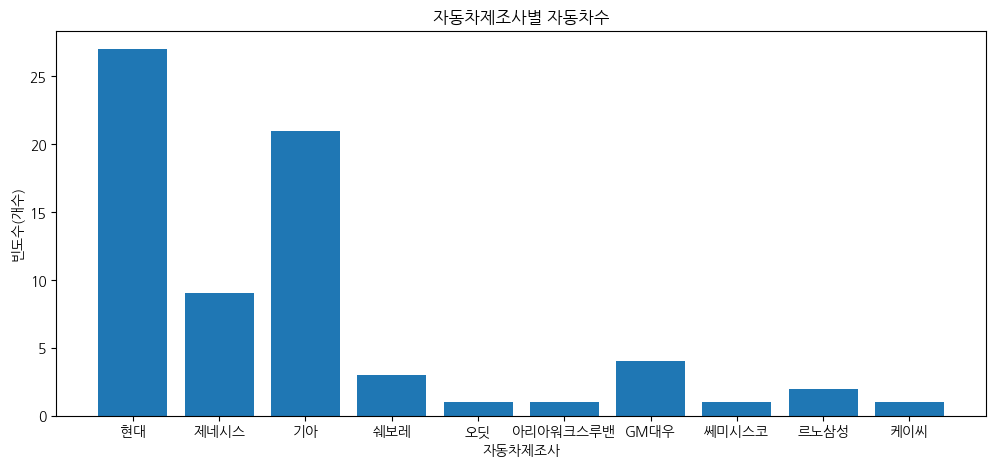

In [23]:
plt.figure(figsize=(12,5))
plt.xlabel('자동차제조사')
plt.ylabel('빈도수(개수)')
plt.title('자동차제조사별 자동차수')
plt.bar(frequency.keys(), frequency.values())
plt.show()

한글 깨짐 해결

In [21]:
# # 필요 라이브러리 불러오기
# import matplotlib.font_manager as fm
# import os
# import matplotlib.pyplot as plt

# # apt-get : 패키지 설치 명령어
# # -qq : 에러외의 메세지 숨기는 옵션키
# !apt-get -qq install fonts-nanum


# fe = fm.FontEntry(
#     fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
#     name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
# fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
# plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

# # 테스트 해보기
# # fig = plt.figure(figsize=(15, 12))
# # fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(15, 12))

# # graph_title = '시험'
# # ax.set_title(f'{graph_title}')
# # ax.set_xlabel('야호 (Hz)', labelpad=20)
# # ax.set_ylabel('시간 (s)', labelpad=20)
# # ax.set_zlabel('이건 뭐지 (dB/Hz)', labelpad=20)

# # ax.view_init(20, 20)
# # plt.show()

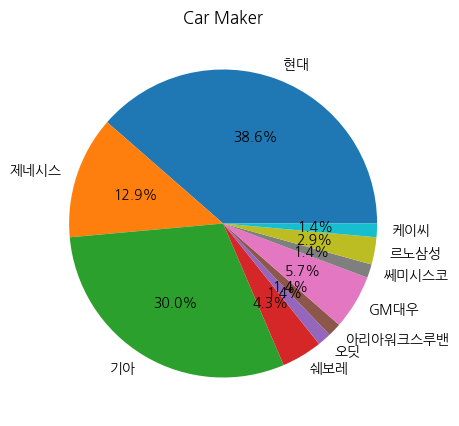

In [32]:
plt.figure(figsize=(5,5))
plt.title('Car Maker')
plt.pie(frequency.values(), labels=frequency.keys(), autopct='%.1f%%')
plt.show()

In [33]:
dfnew = df[['km','price']]
dfnew.head()

,km,price
1,260000.0,690
2,10000.0,700
3,20000.0,3350
4,90000.0,1990
5,160000.0,550


In [34]:
dfnew['price'].shape[0]

70

In [35]:
dfnew['price'].mean()

2422.157142857143

In [36]:
dfnew['price'].min()

160

In [37]:
dfnew['price'].max()

8500

In [38]:
print(dfnew['price'].max() - dfnew['price'].min())

8340


In [39]:
dfnew['price'].median()

1635.0

In [40]:
dfnew['price'].var()

4242235.264803314

In [41]:
dfnew['price'].std()

2059.668726956671

In [42]:
cv = dfnew['price'].std() / dfnew['price'].mean()
cv

0.8503447982434015

In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/usedcars.csv', encoding='euc-kr', index_col=0)
df.head()

,title,year,fuel,km,price,maker
1,현대 제네시스 BH330 럭셔리 프라임팩,08/09(09년형),가솔린,260000.0,690,현대
2,제네시스 더 올 뉴 G80 3.5 T-GDi AWD,20/06(21년형),가솔린,10000.0,700,제네시스
3,기아 K7 프리미어 3.0 GDI 시그니처,19/07(20년형),가솔린,20000.0,3350,기아
4,기아 더 뉴 K7 3.0 GDI 프레스티지,01월 15일,가솔린,90000.0,1990,기아
5,현대 갤로퍼2 숏바디 이노베이션 밴 인터쿨러 엑시드,02월 10일,디젤,160000.0,550,현대


In [45]:
print(df.price.quantile(.25))

750.0


In [46]:
print(df.price.quantile(.50))

1635.0


In [47]:
print(df.price.quantile(.75))

3847.5


In [49]:
print(df.price.quantile([.05,.95]))

0.05     396.05
0.95    5959.50
Name: price, dtype: float64


In [50]:
print(np.percentile(df.price, 25))

750.0


In [51]:
print(np.percentile(df.price, 50))

1635.0


In [52]:
print(np.percentile(df.price, 75))

3847.5


In [54]:
print(np.percentile(df.price, [5,95]))

[ 396.05 5959.5 ]


In [55]:
df.price.describe()

,price
count,70.000000
mean,2422.157143
std,2059.668727
min,160.000000
25%,750.000000
50%,1635.000000
75%,3847.500000
max,8500.000000


In [56]:
df.price.describe()['25%']

750.0

In [57]:
df.price.describe()['50%']

1635.0

In [58]:
df.price.describe()['75%']

3847.5

In [59]:
import pandas as pd
from collections import Counter

In [60]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/usedcars.csv', encoding='euc-kr', index_col=0)
df.head()

,title,year,fuel,km,price,maker
1,현대 제네시스 BH330 럭셔리 프라임팩,08/09(09년형),가솔린,260000.0,690,현대
2,제네시스 더 올 뉴 G80 3.5 T-GDi AWD,20/06(21년형),가솔린,10000.0,700,제네시스
3,기아 K7 프리미어 3.0 GDI 시그니처,19/07(20년형),가솔린,20000.0,3350,기아
4,기아 더 뉴 K7 3.0 GDI 프레스티지,01월 15일,가솔린,90000.0,1990,기아
5,현대 갤로퍼2 숏바디 이노베이션 밴 인터쿨러 엑시드,02월 10일,디젤,160000.0,550,현대


In [63]:
cnt = Counter(df.price)
cnt

Counter({690: 2,
         700: 1,
         3350: 1,
         1990: 2,
         550: 1,
         3080: 1,
         1960: 1,
         990: 1,
         1650: 1,
         1790: 1,
         8500: 1,
         3100: 1,
         6000: 1,
         1200: 1,
         295: 1,
         600: 1,
         4600: 1,
         1620: 1,
         4750: 1,
         5500: 2,
         5000: 2,
         750: 3,
         1350: 1,
         2650: 1,
         1590: 1,
         5910: 1,
         5600: 1,
         1199: 1,
         4150: 1,
         650: 3,
         2150: 1,
         1740: 1,
         570: 1,
         300: 1,
         5215: 1,
         7050: 1,
         4500: 1,
         3400: 1,
         7800: 1,
         1500: 1,
         2500: 1,
         3980: 1,
         1050: 2,
         2499: 1,
         3450: 1,
         1420: 1,
         890: 1,
         520: 1,
         950: 1,
         830: 1,
         1495: 1,
         160: 1,
         489: 1,
         3999: 1,
         2100: 1,
         1690: 1,
        

In [64]:
cnt1 = cnt.most_common()
cnt1

[(750, 3),
 (650, 3),
 (690, 2),
 (1990, 2),
 (5500, 2),
 (5000, 2),
 (1050, 2),
 (700, 1),
 (3350, 1),
 (550, 1),
 (3080, 1),
 (1960, 1),
 (990, 1),
 (1650, 1),
 (1790, 1),
 (8500, 1),
 (3100, 1),
 (6000, 1),
 (1200, 1),
 (295, 1),
 (600, 1),
 (4600, 1),
 (1620, 1),
 (4750, 1),
 (1350, 1),
 (2650, 1),
 (1590, 1),
 (5910, 1),
 (5600, 1),
 (1199, 1),
 (4150, 1),
 (2150, 1),
 (1740, 1),
 (570, 1),
 (300, 1),
 (5215, 1),
 (7050, 1),
 (4500, 1),
 (3400, 1),
 (7800, 1),
 (1500, 1),
 (2500, 1),
 (3980, 1),
 (2499, 1),
 (3450, 1),
 (1420, 1),
 (890, 1),
 (520, 1),
 (950, 1),
 (830, 1),
 (1495, 1),
 (160, 1),
 (489, 1),
 (3999, 1),
 (2100, 1),
 (1690, 1),
 (1150, 1),
 (590, 1),
 (5580, 1),
 (320, 1),
 (870, 1)]

In [65]:
cnt2 = cnt.most_common(7)
cnt2

[(750, 3), (650, 3), (690, 2), (1990, 2), (5500, 2), (5000, 2), (1050, 2)]

In [66]:
mode = cnt.most_common(1)
mode

[(750, 3)]

In [68]:
mode[0][0]
#중첩 리스트의 인덱싱

750

In [69]:
mode[0][1]

3

In [72]:
df.price.describe()

,price
count,70.000000
mean,2422.157143
std,2059.668727
min,160.000000
25%,750.000000
50%,1635.000000
75%,3847.500000
max,8500.000000


In [73]:
df.km.describe()

,km
count,70.000000
mean,86267.714286
std,69112.602378
min,13.000000
25%,30000.000000
50%,80000.000000
75%,127500.000000
max,290000.000000


In [74]:
df.T

,1,2,3,4,5,6,7,8,9,10,...,61,62,63,64,65,66,67,68,69,70
title,현대 제네시스 BH330 럭셔리 프라임팩,제네시스 더 올 뉴 G80 3.5 T-GDi AWD,기아 K7 프리미어 3.0 GDI 시그니처,기아 더 뉴 K7 3.0 GDI 프레스티지,현대 갤로퍼2 숏바디 이노베이션 밴 인터쿨러 엑시드,기아 올 뉴 카니발 3.3 GDi 9인승 하이리무진 노블레스,기아 모하비 KV300 4WD 상시4WD,현대 포터2 초장축 슈퍼캡 CRDi 기본형,현대 코나 1.6 T-GDi 2WD 모던 테크,현대 아반떼AD 1.6 T-GDi 스포츠 익스트림 셀렉션,...,기아 더 뉴 모닝 밴 고급형,케이씨 노블 클라쎄 카니발,GM대우 BH 119,기아 더 뉴 스포티지R 2.0 디젤 2WD 프레스티지,현대 아반떼AD 1.6 T-GDi 스포츠,기아 레이 1.0 터보 프레스티지,르노삼성 SM7 뉴 아트 프레스티지,현대 뉴 카운티 장축 SUP 29인승,기아 뉴 오피러스 GH270 고급형,기아 더 프레스티지 K7 3.0 LPi 프레스티지
year,08/09(09년형),20/06(21년형),19/07(20년형),01월 15일,02월 10일,16/09(17년형),01월 15일,16/04(17년형),17/08(18년형),07월 18일,...,10월 16일,17/09(18년형),04/12(05년형),04월 15일,17/10(18년형),14/08(15년형),09/10(10년형),03월 18일,07월 03일,12월 06일
fuel,가솔린,가솔린,가솔린,가솔린,디젤,가솔린,디젤,디젤,가솔린,가솔린,...,가솔린,디젤,디젤,디젤,가솔린,가솔린,가솔린,디젤,가솔린,LPG
km,260000.0,10000.0,20000.0,90000.0,160000.0,120000.0,140000.0,180000.0,50000.0,70000.0,...,30000.0,80000.0,150000.0,160000.0,100000.0,60000.0,150000.0,50000.0,100000.0,160000.0
price,690,700,3350,1990,550,3080,1960,990,1650,1790,...,489,3999,2100,1690,1150,1050,590,5580,320,870
maker,현대,제네시스,기아,기아,현대,기아,기아,현대,현대,현대,...,기아,케이씨,GM대우,기아,현대,기아,르노삼성,현대,기아,기아
